In [4]:
from pathlib import Path
import numpy as np
import os
import json
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


#Paths 
train_dir = Path("/Users/eric/Documents/Masters Degree/M9.-Deep learning aplicada, NLP y visión artificial/7.-Evaluacion final M9/Caso Practico 1/data/seg_train/")
test_dir = Path("/Users/eric/Documents/Masters Degree/M9.-Deep learning aplicada, NLP y visión artificial/7.-Evaluacion final M9/Caso Practico 1/data/seg_test/")
model_path = Path("/Users/eric/Documents/Masters Degree/M9.-Deep learning aplicada, NLP y visión artificial/7.-Evaluacion final M9/Caso Practico 1/models/base_model.h5/")
history_path = Path("/Users/eric/Documents/Masters Degree/M9.-Deep learning aplicada, NLP y visión artificial/7.-Evaluacion final M9/Caso Practico 1/models/base_model_history.json/")


# Image generator with split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

#Our generators
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size= 16,
    class_mode='categorical',
    subset='training', 
    shuffle = True
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=1,  # 1 image per batch
    class_mode='categorical',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size= 16,
    class_mode='categorical',
    subset='validation',
    shuffle = True
)

#Class
class_labels = list(test_generator.class_indices.keys())

#Model
model = Sequential([
    Input(shape = (150, 150, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
])


Found 11230 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


Used memory before training: 50.9%
Epoch 1/10


/opt/anaconda3/envs/ai-env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


702/702 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3643 - loss: 1.9774

2025-06-01 15:17:21.027590: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


702/702 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.3644 - loss: 1.9767 - val_accuracy: 0.5678 - val_loss: 1.1378
Epoch 2/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.5581 - loss: 1.0734 - val_accuracy: 0.5599 - val_loss: 1.1436
Epoch 3/10
701/702 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6300 - loss: 0.9361

702/702 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.6301 - loss: 0.9360 - val_accuracy: 0.6348 - val_loss: 0.9911
Epoch 4/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7153 - loss: 0.7581

702/702 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.7153 - loss: 0.7580 - val_accuracy: 0.6687 - val_loss: 0.9711
Epoch 5/10
701/702 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7838 - loss: 0.5897

702/702 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.7838 - loss: 0.5896 - val_accuracy: 0.6794 - val_loss: 0.9173
Epoch 6/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8398 - loss: 0.4555 - val_accuracy: 0.6758 - val_loss: 1.0576
Epoch 7/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8781 - loss: 0.3486 - val_accuracy: 0.6737 - val_loss: 1.1183
Epoch 8/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9081 - loss: 0.2778 - val_accuracy: 0.6655 - val_loss: 1.2334
Epoch 9/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9311 - loss: 0.2155 - val_accuracy: 0.6394 - val_loss: 1.5662
Epoch 10/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9524 - loss: 0.1696 - val_accuracy: 0.6327 - val_loss: 1.7289


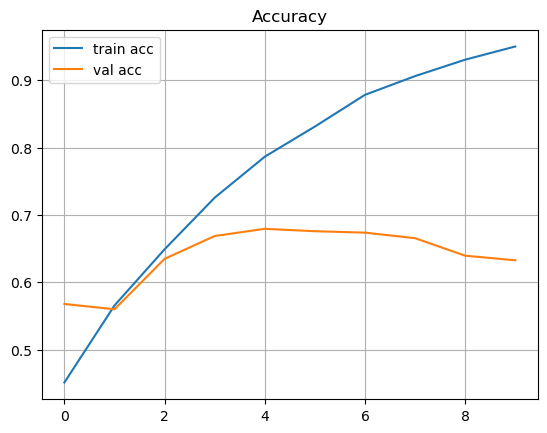

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


2025-06-01 15:19:18.386934: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


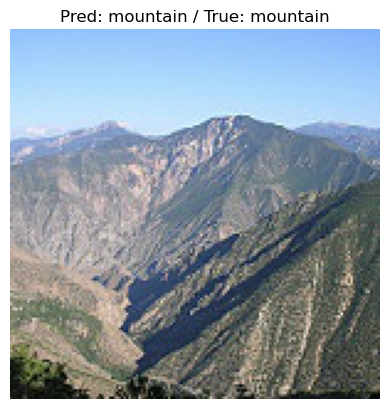

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


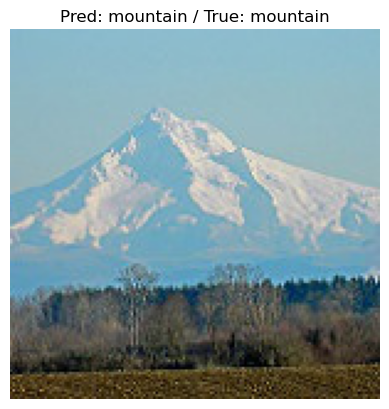

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


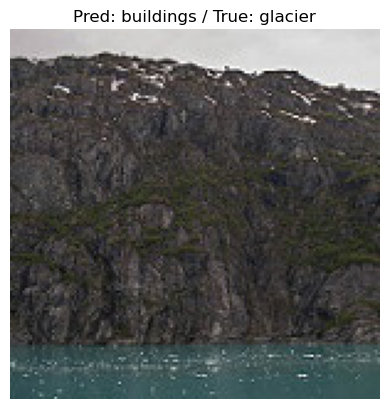

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


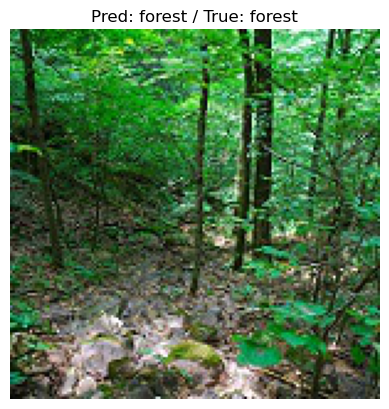

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


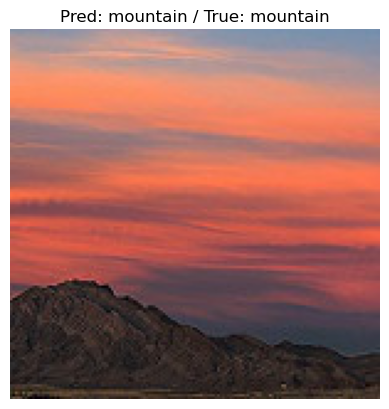

In [5]:
#Compilation
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Callbacks
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint(model_path, save_best_only=True)

import psutil
print(f"Used memory before training: {psutil.virtual_memory().percent}%")

#Training
history = model.fit(train_generator, 
                    validation_data = val_generator, 
                    epochs=10, 
                    callbacks = [early_stop, checkpoint])

#Saving model 
model_path = Path("/Users/eric/Documents/Masters Degree/M9.-Deep learning aplicada, NLP y visión artificial/7.-Evaluacion final M9/Caso Practico 1/models/base_model.h5/")
model.save(model_path)

# Saving history in JSON
history_dict = history.history
with open(history_path, 'w') as f:
    json.dump(history_dict, f)

# Showing fast results
plt.plot(history_dict['accuracy'], label='train acc')
plt.plot(history_dict['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Showing 5 images with prediction
for i in range(5):
    image, label = next(test_generator)
    pred = model.predict(image)
    pred_label = np.argmax(pred)
    true_label = np.argmax(label)

    plt.imshow(image[0])
    plt.title(f"Pred: {class_labels[pred_label]} / True: {class_labels[true_label]}")
    plt.axis('off')
    plt.show()
